In [10]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Guru", "Memancing", "Laki-Laki"), 
        ("Budi", 23, "Yutuber", "Minum", "Laki-Laki"),
        ("Citra", 29, "Pengusaha", "Tidur", "Perempuan"), 
        ("Dina", 45, "Seleb", "Foto foto", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
|  Ali|  34|     Guru|Memancing|Laki-Laki|
| Budi|  23|  Yutuber|    Minum|Laki-Laki|
|Citra|  29|Pengusaha|    Tidur|Perempuan|
| Dina|  45|    Seleb|Foto foto|Perempuan|
+-----+----+---------+---------+---------+



In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("DataFrame:")
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
print("Filtered (Usia > 30):")
df_filtered.show()

# Menghitung rata-rata usia
df_avg = df.groupBy().agg(avg("Usia"))
print("Rata-Rata Usia:")
df_avg.show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
print("Sorted by Usia (descending):")
df_sorted.show()


DataFrame:
+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

Filtered (Usia > 30):


+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

Rata-Rata Usia:
+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

Sorted by Usia (descending):
+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [12]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menambahkan kolom baru
gender = ["Laki-laki", "Laki-laki", "Perempuan", "Perempuan"]
df_pandas['Gender'] = gender

print("DataFrame:")
print(df_pandas)

# Filtering usia
filtered_df = df_pandas[df_pandas['Usia'] > 30]

print("\nUsia > 30:")
print(filtered_df)


DataFrame:
    Nama  Usia     Gender
0    Ali    34  Laki-laki
1   Budi    23  Laki-laki
2  Citra    29  Perempuan
3   Dina    45  Perempuan

Usia > 30:
   Nama  Usia     Gender
0   Ali    34  Laki-laki
3  Dina    45  Perempuan


DataFrame Gabungan:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik Deskriptif:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


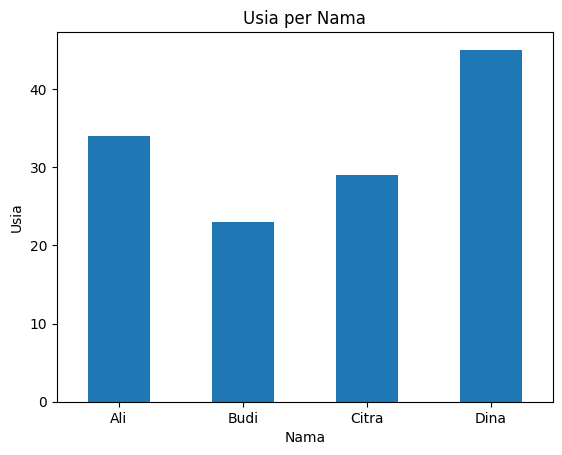

In [13]:
import pandas as pd

# DataFrame Pandas pertama
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# DataFrame Pandas kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Menggabungkan dua DataFrame dengan Nama
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("DataFrame Gabungan:")
print(df_joined)

# statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_pandas.describe())

# Visualisasi Data Usia
df_pandas['Usia'].plot(kind='bar')
plt.xlabel('Nama')
plt.ylabel('Usia')
plt.title('Usia per Nama')
plt.xticks(ticks=range(len(df_pandas['Nama'])), labels=df_pandas['Nama'], rotation=0)
plt.show()


In [14]:
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
print("DataFrame Pandas dari PySpark:")
print(df_pandas_from_spark)

print("\nDataFrame PySpark dari Pandas:")
df_spark_from_pandas.show()

DataFrame Pandas dari PySpark:
    Nama  Usia
0    Ali    34
1   Budi    23
2  Citra    29
3   Dina    45

DataFrame PySpark dari Pandas:
+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+



In [9]:
# Mengkonversi DataFrame PySpark ke Pandas
df_spark_pandas = df_spark_from_pandas.toPandas()

# Menggabungkan kedua DataFrame Pandas
df_combined = pd.concat([df_pandas_from_spark, df_spark_pandas], ignore_index=True)

# Menghitung nilai maksimum usia
max_age = df_combined['Usia'].max()
print("Nilai maksimum usia:", max_age)

Nilai maksimum usia: 45
